<a href="https://colab.research.google.com/github/ChipMcCallahan/CC1LevelsetTransformer/blob/main/cc1_levelset_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC1LevelsetTransformer Demo

Transforms CC1 Levelsets by tile replacement, e.g. into starters for "walls of" sets.

### Install the packages from GitHub and make imports.

In [1]:
# install the packages from GitHub and make imports
%%capture
!pip install git+https://github.com/ChipMcCallahan/CC1Tools.git

In [2]:
from cc1_tools import CC1LevelsetReader, CC1LevelsetWriter, CC1LevelImager, CC1LevelsetTransformer, CC1TileCodes, CC1TileCode, Levelset

import IPython.display as ipd    

### Import a custom levelset from the internet.

In [3]:
# import and read in a custom levelset from the internet
reader = CC1LevelsetReader()
cclp1 = reader.import_and_read("CCLP1.dat")

Successfully retrieved https://bitbusters.club/gliderbot/sets/cc1/CCLP1.dat.
Successfully retrieved https://storage.googleapis.com/file-hosting-abcdef/chips/CCLP1.ccx


# Walls Of

Turn it into a "Walls Of" set by removing everything that isn't a wall.

In addition to walls, the default options keep **real blue walls**, **invisible walls**, and **thin wall panels**.

The transformation happens in place. If you don't want the in-memory levelset modified, pass in a copy.

In [4]:
transformer = CC1LevelsetTransformer()
wocclp1 = Levelset()
wocclp1.CopyFrom(cclp1)
transformer.walls_of(wocclp1)

### To exclude thin panel walls: ###
# transformer.walls_of(wocclp1, walls=CC1TileCodes.WALLS)

### To only include standard walls: ###
# transformer.walls_of(wocclp1, walls=CC1TileCode.WALL)

### Confirm that it worked.

JUXTAPOSITION


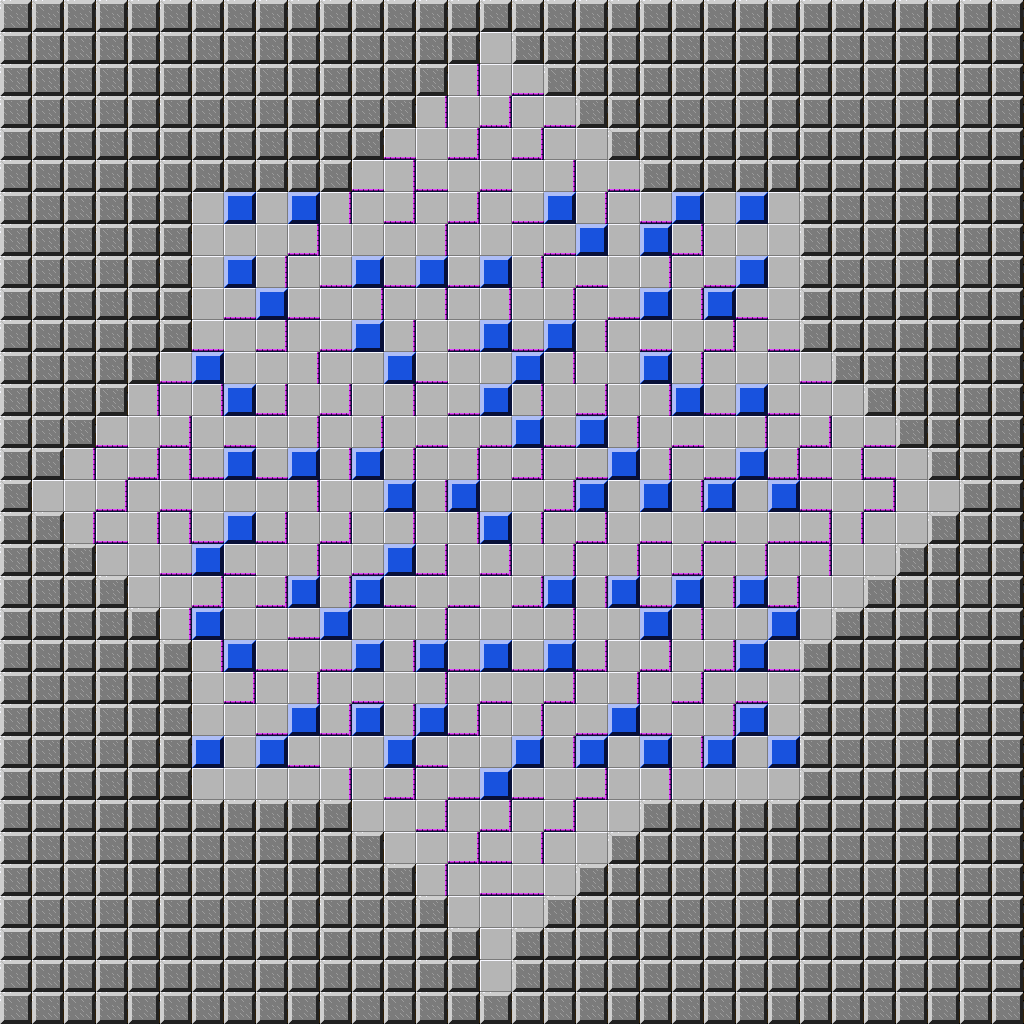

SECRET PASSAGES


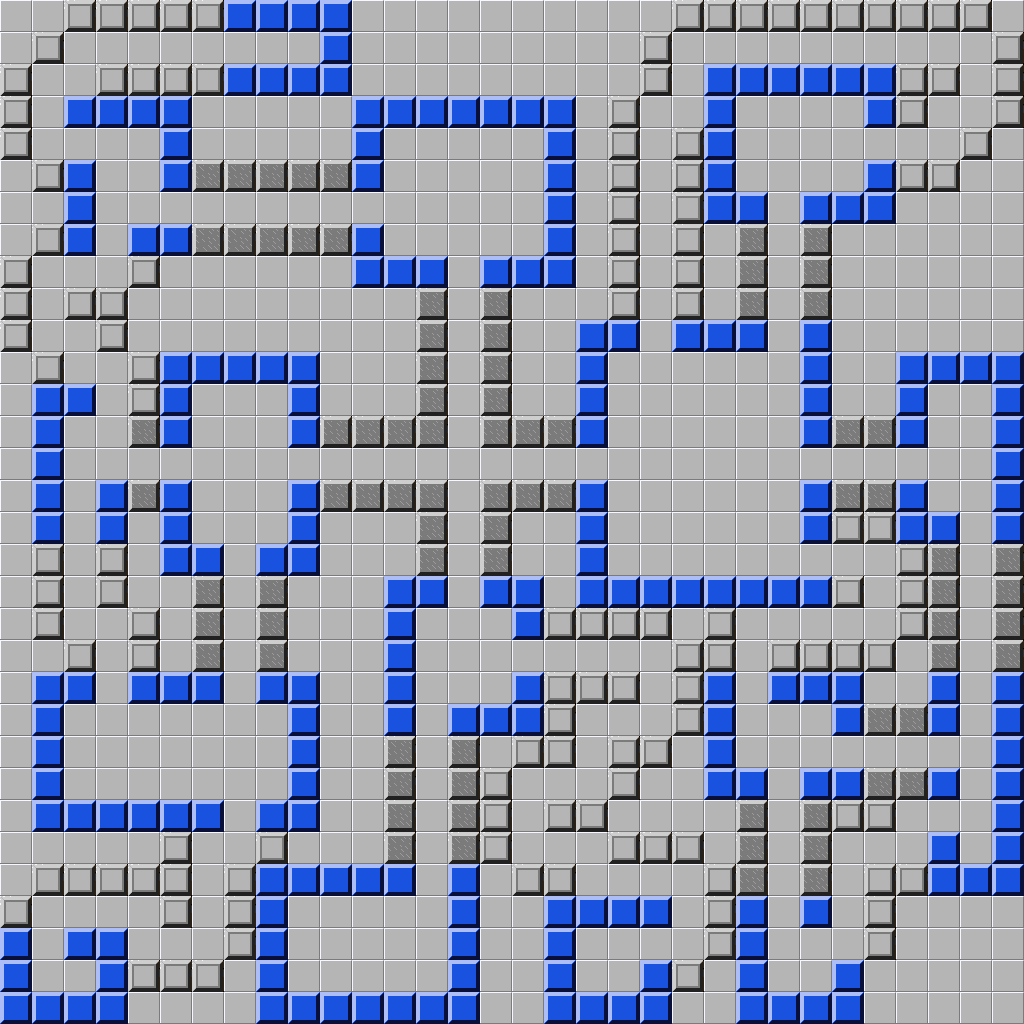

In [5]:
imager = CC1LevelImager()
print("JUXTAPOSITION")
img = imager.save_png(wocclp1.levels[70-1], "temp.png")
display(ipd.Image("temp.png"))
print("SECRET PASSAGES")
img = imager.save_png(wocclp1.levels[78-1], "temp.png")
display(ipd.Image("temp.png"))

### Save the new set to disk.

In [6]:
writer = CC1LevelsetWriter()
writer.write(cclp1, filename="WoCCLP1.dat")

Wrote set to file WoCCLP1.dat


### Download to your PC from the Colab notebook.

In [7]:
from google.colab import files
files.download("WoCCLP1.dat")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Mobs Of

### "Mobs Of" keeps all monsters, players, and blocks.
(By default it keeps the clone machines beneath them, also. Turn it off by passing `keep_cloners=False`.)

ELEVATORS


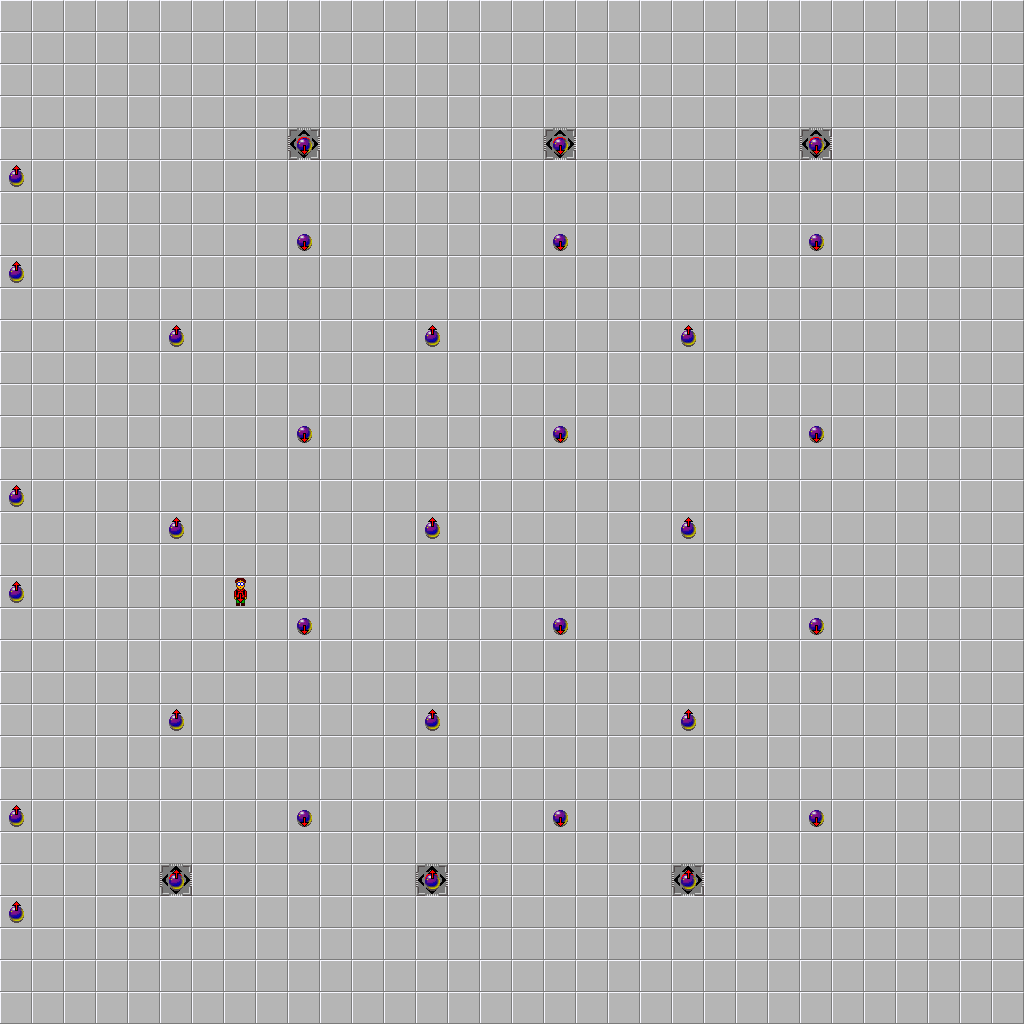

HABITAT


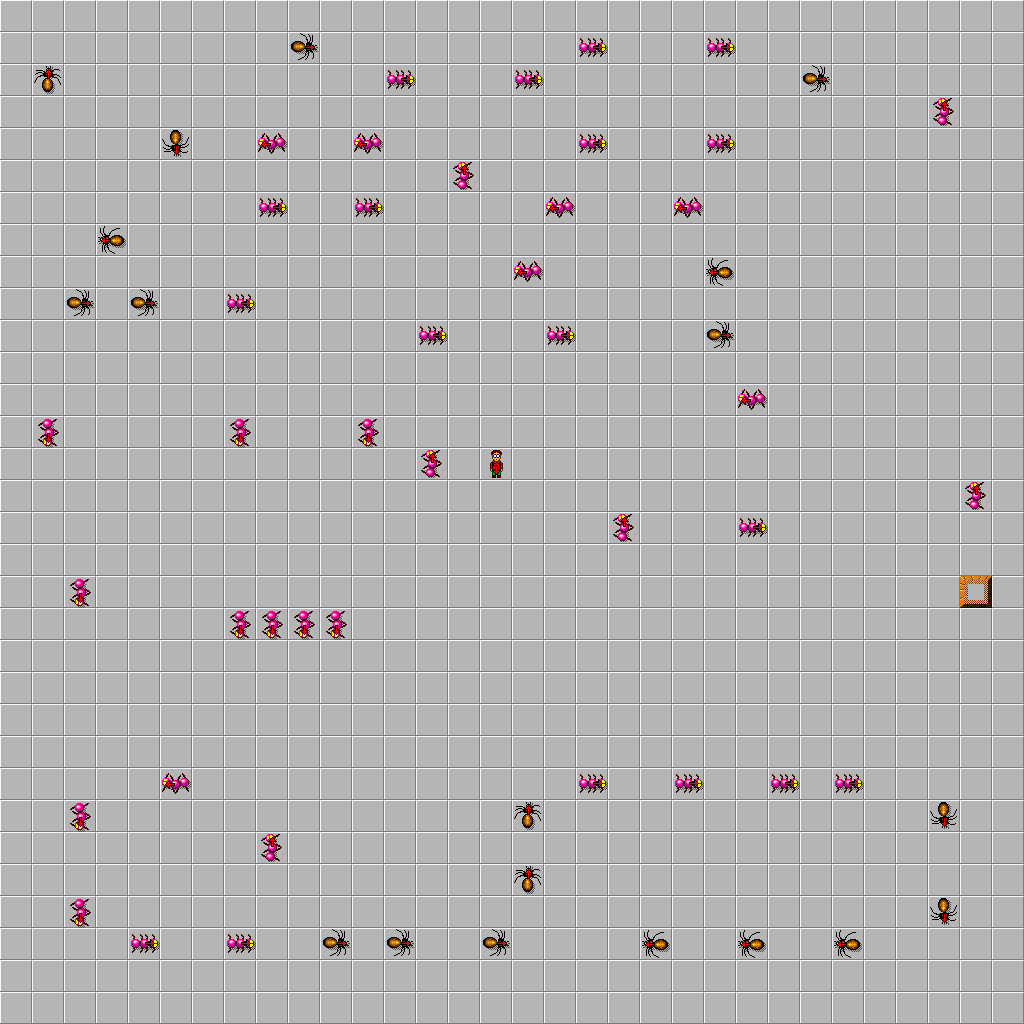

In [8]:
mocclp1 = Levelset()
mocclp1.CopyFrom(cclp1)
transformer.mobs_of(mocclp1)
#transformer.mobs_of(mocclp1, keep_cloners=False)

imager = CC1LevelImager()
print("ELEVATORS")
img = imager.save_png(mocclp1.levels[79-1], "temp.png")
display(ipd.Image("temp.png"))
print("HABITAT")
img = imager.save_png(mocclp1.levels[37-1], "temp.png")
display(ipd.Image("temp.png"))

In [9]:
writer = CC1LevelsetWriter()
writer.write(cclp1, filename="MoCCLP1.dat")
from google.colab import files
files.download("MoCCLP1.dat")

Wrote set to file MoCCLP1.dat


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Mob Switcher

Replace monster types while retaining direction. Highly recommended to use these predefined CC1TileCodes sets.  
CC1TileCodes.ANTS  
CC1TileCodes.PARAMECIA  
CC1TileCodes.GLIDERS  
CC1TileCodes.FIREBALLS  
CC1TileCodes.TANKS  
CC1TileCodes.BALLS  
CC1TileCodes.WALKERS  
CC1TileCodes.TEETH  
CC1TileCodes.BLOBS  
CC1TileCodes.MONSTERS  

THE LAST STARFIGHTER


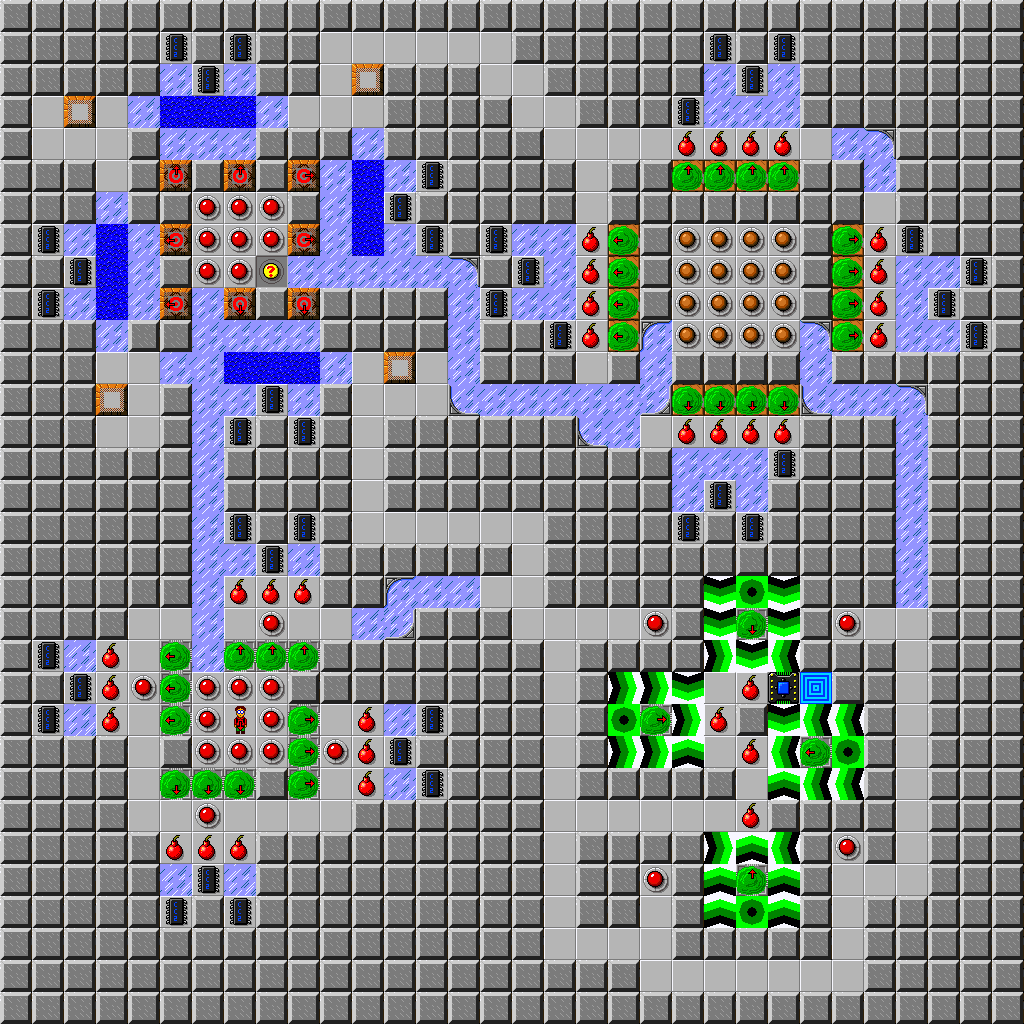

In [10]:
blobsofcclp1 = Levelset()
blobsofcclp1.CopyFrom(cclp1)
transformer.mob_switcher(blobsofcclp1, CC1TileCodes.MONSTERS, CC1TileCodes.BLOBS)

# To turn only walkers and balls into blobs, use
# transformer.mob_switcher(blobsofcclp1, CC1TileCodes.WALKERS.union(CC1TileCodes.BALLS), CC1TileCodes.BLOBS)

imager = CC1LevelImager()
print("THE LAST STARFIGHTER")
img = imager.save_png(blobsofcclp1.levels[28-1], "temp.png")
display(ipd.Image("temp.png"))

In [11]:
writer = CC1LevelsetWriter()
writer.write(cclp1, filename="BlobsOfCCLP1.dat")
from google.colab import files
files.download("BlobsOfCCLP1.dat")

Wrote set to file BlobsOfCCLP1.dat


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Other Functionality
### Operate on slices of levels.
Instead of passing in the whole levelset, can also pass in single levels or collections of levels, which like the levelset will be modified in place (no return value).

### Keep and transform
The `keep` and `transform` methods allow custom transformation strategies.

Build your own sets of `CC1TileCode` enums or use the provided enum sets from the `CC1TileCodes` class. Examples are:  
ALL  
ICE  
FORCES  
WALLS  
PANELS  
BLOCKS (includes CLONE_BLOCK_N/E/S/W)  
PLAYERS  
ANTS  
PARAMECIA  
GLIDERS  
FIREBALLS  
TANKS  
BALLS  
WALKERS  
TEETH  
BLOBS  
MONSTERS  
ENTITIES (monsters, blocks, players)  
NONENTITIES  
DOORS  
KEYS  
BOOTS  
PICKUPS  
BUTTONS  

In [12]:
# Erase all boots and keys, for levels 30-39 only.
# transformer.keep(cclp1_copy.levels[30:40], CC1TileCodes.ALL.difference(CC1TileCodes.PICKUPS))

# Replace all chips with bombs for level 1 only.
# transformer.transform(cclp1_copy.levels[1], CC1TileCode.CHIP, CC1TileCode.BOMB)

# Replace all doors and sockets with blocks.
# transformer.transform(cclp1_copy, CC1TileCodes.DOORS.union(set([CC1TileCode.SOCKET])), CC1TileCode.BLOCK)